In [1]:
import numpy as np
import pandas as pd
import os
import sys

from utils import select_ores_greedy
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS'] 
# %matplotlib inline

import pickle
import cv2

import importlib
# from classifiers import R_from_path
%config InlineBackend.figure_format = 'png' 

In [2]:
pd.options.mode.chained_assignment = None  # 默认是'warn'


In [3]:
with open('input_0219_0224_0225.pkl', 'rb') as f:
    input_all = pickle.load(f)
pixels = input_all[0]
data = input_all[1]

In [4]:
index_0219 = data.loc[data['source'] == 'source_0'].index.values
input_0219_test = [[pixels[0][index_0219], pixels[1][index_0219]], data.loc[index_0219]]

In [10]:
grouped

NameError: name 'grouped' is not defined

/var/folders/dm/mjb3j0rx4mg43ppsjkbnm1jr0000gn/T/ipykernel_79927/2252206831.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = data_plot.groupby(pd.cut(data_plot['Pb_grade'] + data_plot['Zn_grade'], bins=20))['weight'].mean()


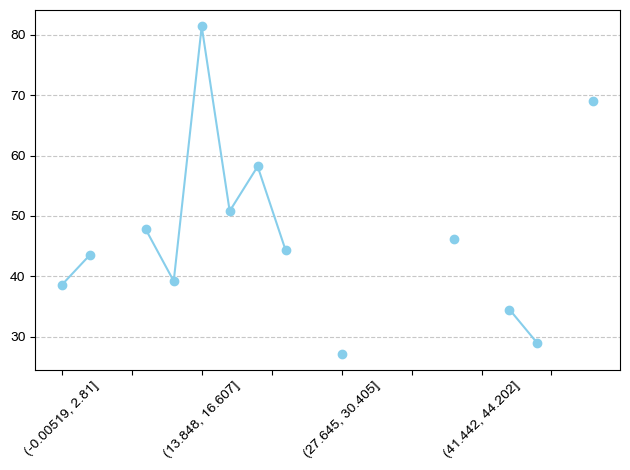

In [11]:
sources = ['source_0']
for source in sources:
    data_plot = data.loc[data['source'] == source]
    data_plot['valuable_metal'] = data_plot['weight'] * (data_plot['Pb_grade'] + data_plot['Zn_grade']) / 100

    # 按重量分组并计算平均有价金属质量
    grouped = data_plot.groupby(pd.cut(data_plot['Pb_grade'] + data_plot['Zn_grade'], bins=20))['weight'].mean()

    # plt.figure(figsize=(10, 6))
    # grouped.plot(kind='bar', color='skyblue')
    grouped.plot(kind='line', marker='o', color='skyblue')

    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

/var/folders/dm/mjb3j0rx4mg43ppsjkbnm1jr0000gn/T/ipykernel_48472/2787584442.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = data_plot.groupby(pd.cut(data_plot['weight'], bins=10))['valuable_metal'].mean()


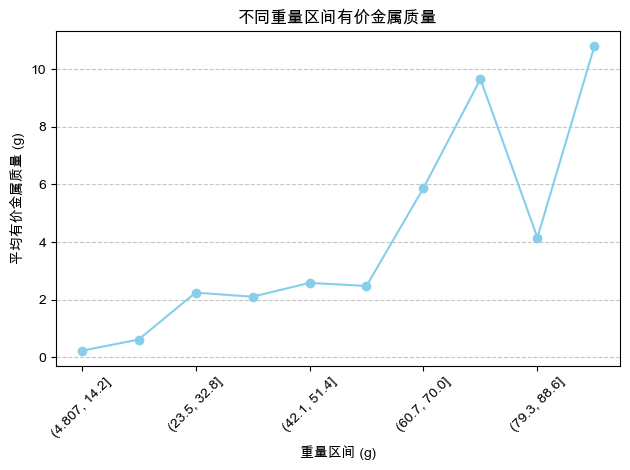

/var/folders/dm/mjb3j0rx4mg43ppsjkbnm1jr0000gn/T/ipykernel_48472/2787584442.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = data_plot.groupby(pd.cut(data_plot['weight'], bins=10))['valuable_metal'].mean()


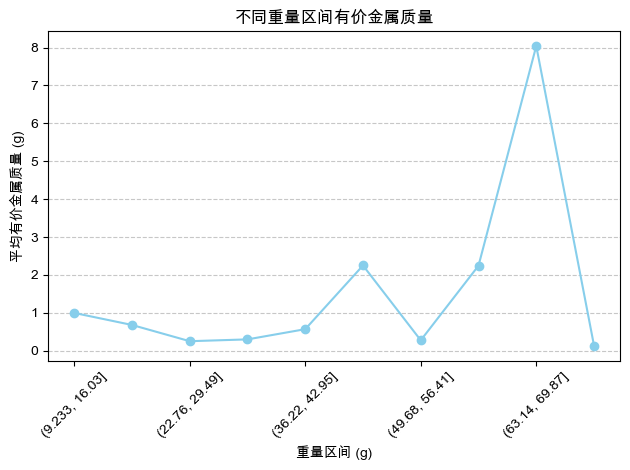

/var/folders/dm/mjb3j0rx4mg43ppsjkbnm1jr0000gn/T/ipykernel_48472/2787584442.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = data_plot.groupby(pd.cut(data_plot['weight'], bins=10))['valuable_metal'].mean()


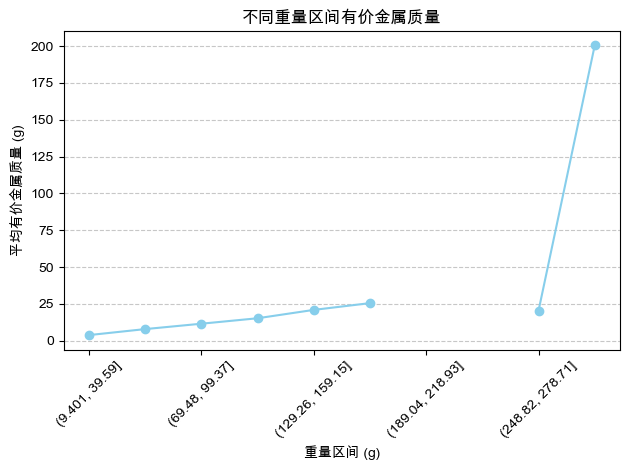

In [60]:
sources = ['source_0', 'source_1', 'source_2']
for source in sources:
    data_plot = data.loc[data['source'] == source]
    data_plot['valuable_metal'] = data_plot['weight'] * (data_plot['Pb_grade'] + data_plot['Zn_grade']) / 100

    # 按重量分组并计算平均有价金属质量
    grouped = data_plot.groupby(pd.cut(data_plot['weight'], bins=10))['valuable_metal'].mean()

    # plt.figure(figsize=(10, 6))
    # grouped.plot(kind='bar', color='skyblue')
    grouped.plot(kind='line', marker='o', color='skyblue')

    plt.title('不同重量区间有价金属质量')
    plt.xlabel('重量区间 (g)')
    plt.ylabel('平均有价金属质量 (g)')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

In [5]:
selected = select_ores_greedy(data, 5, 1)

目标品位: 1.0000, 实际得到: 1.0000


In [14]:
np.average(selected['Zn_Pb_grade'], weights=selected['weight'])

0.9999997295347999